In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load diamonds dataset
data = sns.load_dataset('diamonds')


In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


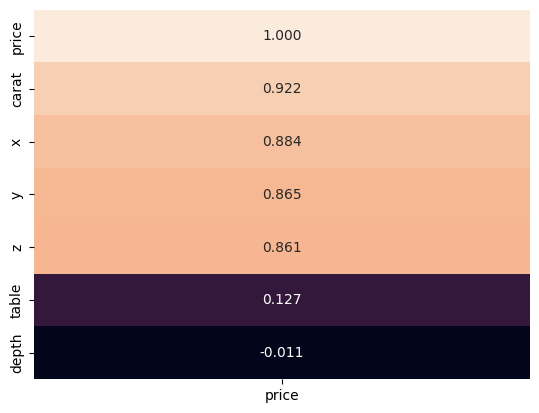

In [3]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlations
correlation = numeric_data.corr()

# Create a heatmap with specific settings
sns.heatmap(correlation[['price']].sort_values(
    by='price', ascending=False), annot=True, fmt='.3f', cbar=False)

plt.show()


In [19]:
# Get the feature with the strongest correlation (excluding 'price' itself)
strongest_feature = correlation['price'].drop('price').idxmax()

# Split the data into training and test sets
X = data[[strongest_feature]]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

print(strongest_feature)
print(X_train.shape[0])
print(X_test.shape[0])

carat
37758
16182


In [22]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

print(f"Coefficient for '{strongest_feature}': {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient for 'carat': 7765.318283928661
Intercept: -2258.9186559940026


In [6]:
# Score the model on test dataset
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}")


Test Score: 0.8486858713767872


In [7]:
# Predict y values using X_test
y_pred = model.predict(X_test)


In [8]:
# Create a DataFrame for predicted values
pred_df = pd.DataFrame(y_pred, columns=['Predicted Price'])


In [9]:
# Combine the X_test, y_test, and predictions into one DataFrame
result_df = pd.concat([X_test.reset_index(drop=True), 
                       y_test.reset_index(drop=True), pred_df], axis=1)

# Display the first five rows
print(result_df.head())


   carat  price  Predicted Price
0   0.24    559      -395.242268
1   0.58   2201      2244.965949
2   0.40   1238       847.208658
3   0.43   1304      1080.168206
4   1.55   6901      9777.324684


In [10]:
# Combine the X_test, y_test, and predictions into one DataFrame
result_df = pd.concat([X_test.reset_index(drop=True), 
                       y_test.reset_index(drop=True), pred_df], axis=1)

# Display the first five rows
print(result_df.head())


   carat  price  Predicted Price
0   0.24    559      -395.242268
1   0.58   2201      2244.965949
2   0.40   1238       847.208658
3   0.43   1304      1080.168206
4   1.55   6901      9777.324684


In [12]:
# Combine the X_test, y_test, and predictions into one DataFrame
result_df = pd.concat([X_test.reset_index(drop=True), 
                       y_test.reset_index(drop=True), pred_df], axis=1)

# Display the first five rows
print(result_df.head())


   carat  price  Predicted Price
0   0.24    559      -395.242268
1   0.58   2201      2244.965949
2   0.40   1238       847.208658
3   0.43   1304      1080.168206
4   1.55   6901      9777.324684


In [13]:
# Melt the actual and predicted price columns
melted_df = pd.melt(result_df, id_vars=[strongest_feature], 
                    value_vars=['price', 'Predicted Price'], var_name='Type', value_name='Price')

print(melted_df.head())


   carat   Type   Price
0   0.24  price   559.0
1   0.58  price  2201.0
2   0.40  price  1238.0
3   0.43  price  1304.0
4   1.55  price  6901.0


C:\Users\s225146371\AppData\Local\Temp\ipykernel_11788\3651215369.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=strongest_feature, y='Price', hue='Type', data=melted_df, ci=None)


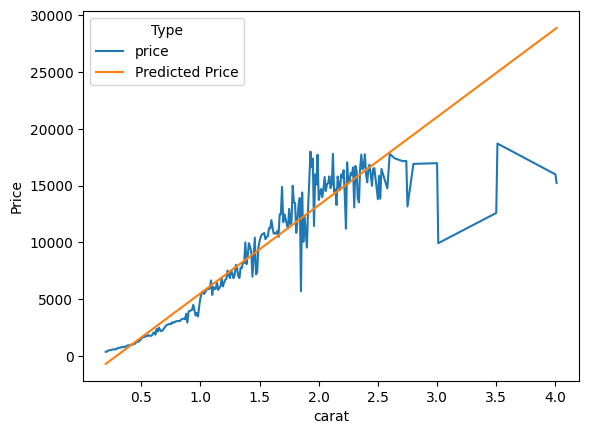

In [14]:
# Plot the predicted data without confidence interval
sns.lineplot(x=strongest_feature, 
             y='Price', hue='Type', data=melted_df, ci=None)

plt.show()


# Part 2

In [27]:
# Load mpg dataset
mpg_data = sns.load_dataset('mpg')

#select only numerical
num_data = mpg_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations for the mpg column
mpg_correlation = num_data.corr()

# Sort the correlations
num_data.corr()[['mpg']].sort_values(by='mpg', ascending=False)

,mpg
mpg,1.000000
model_year,0.579267
acceleration,0.420289
cylinders,-0.775396
horsepower,-0.778427
displacement,-0.804203
weight,-0.831741


In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    mpg_data[['weight']], mpg_data[['mpg']],
    test_size=0.20, random_state=20)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6913392734724183

In [29]:
model.score(x_train, y_train)

0.6863542676327211

In [30]:
y_predicted = model.predict(x_test)

In [31]:
predicted = pd.DataFrame(y_predicted, columns=['predicted_mpg'])
predicted

,predicted_mpg
0,18.868866
1,20.015039
2,28.180585
3,20.015039
4,26.180401
...,...
75,25.071685
76,30.727636
77,26.644863
78,10.111506


In [32]:
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined

,predicted_mpg,weight,mpg
0,18.868866,3563,15.0
1,20.015039,3410,18.1
2,28.180585,2320,34.5
3,20.015039,3410,16.2
4,26.180401,2587,21.0
...,...,...,...
75,25.071685,2735,27.0
76,30.727636,1980,36.0
77,26.644863,2525,29.0
78,10.111506,4732,9.0


In [33]:
combined['residuals'] = combined.mpg - combined.predicted_mpg
combined.head()

,predicted_mpg,weight,mpg,residuals
0,18.868866,3563,15.0,-3.868866
1,20.015039,3410,18.1,-1.915039
2,28.180585,2320,34.5,6.319415
3,20.015039,3410,16.2,-3.815039
4,26.180401,2587,21.0,-5.180401


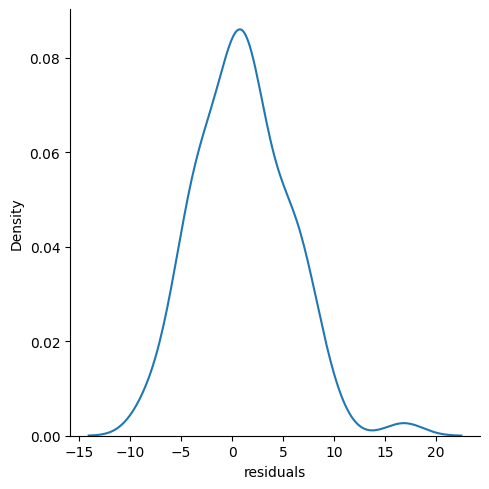

In [34]:
sns.displot(data=combined, x='residuals', kind='kde')

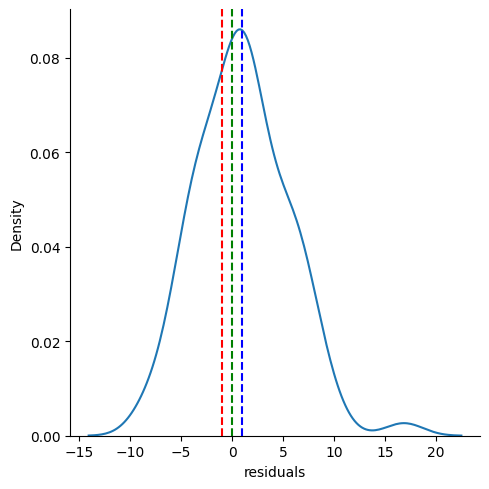

In [35]:
sns.displot(data=combined, x='residuals', kind='kde')
plt.axvline(x=0, color='green', linestyle='--')
plt.axvline(x=-1, color='red', linestyle='--')
plt.axvline(x=1, color='blue', linestyle='--')
plt.show()

In [36]:
melted = pd.melt(combined, id_vars=['weight'],
                 value_vars=['mpg', 'predicted_mpg'],
                 var_name='mpg_type', value_name='mpg_value')
melted

,weight,mpg_type,mpg_value
0,3563,mpg,15.000000
1,3410,mpg,18.100000
2,2320,mpg,34.500000
3,3410,mpg,16.200000
4,2587,mpg,21.000000
...,...,...,...
155,2735,predicted_mpg,25.071685
156,1980,predicted_mpg,30.727636
157,2525,predicted_mpg,26.644863
158,4732,predicted_mpg,10.111506


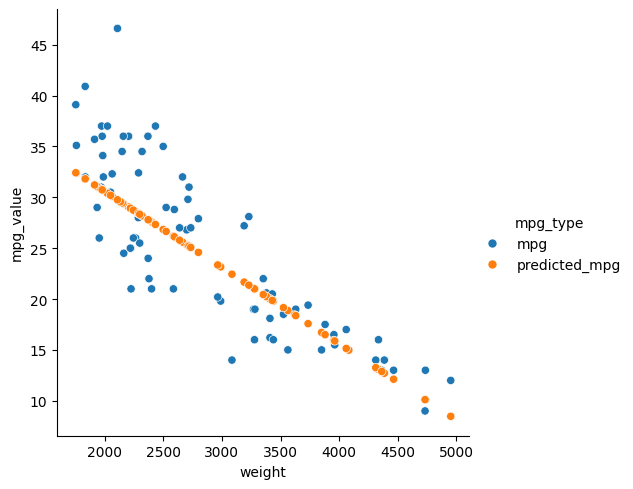

In [37]:
sns.relplot(melted, x='weight', y='mpg_value', hue='mpg_type')